<a href="https://colab.research.google.com/github/velurubhanuprasad144-boop/customer-churn-prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

##Problem Statement for Customer Churn Prediction

A telecommunications company is experiencing a decline of its customer retention rate. Customers are churning (leaving the service) but the company does not have a clear understanding why this is happening and how to predict which customers are likely to leave the service.

Customer churn is costly because:

Retaining the old customer is likely less expensive than getting a new customers.

Losing customers reduces the revenue and impacts long term profitability to the company.

Understanding the churn patterns allows the company to improve customer experience and optimize marketing in the company.

Objective:

Develop the model for machine learning  that can predict customer churn based on service,demographic and account related features. The goal is to identify at risk customers early and take proactive measures to reduce churn rates in the telecommunications company.

## Import required libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import os

## loading dataset

Loads the Telco Customer Churn data set into Pandas and displays the first few rows for an initial check.




In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/nithin790/TelcoCustomerChurn-ML-Model/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Preprocessing

Drops customerID because it is not useful for prediction.

Replaces empty strings with the NaN values.


Categorical variables like gender, contract type etc are converted into numerical values using Label Encoding to transform into the categorical values.

TotalCharges was stored as a string and we  Convert it into numeric.



In [ ]:
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)


 The customerID feature normally serves as a unique number to identify  the customer.But it do not carry the useful information for the model to  predict the churn. So it was removed to avoid unnecessary complexity in  the machine learning model. By dropping this column we ensure that the model focuses on the relevant features that influence the customer churn rather than on the identifier that provides no predictive value.

## Handling missing values


In [ ]:
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

In this data set we first replaced any empty spaces with NaN values.This step ensures that any cells with empty strings are treated as missing values and making it easier to handle them during data cleaning. Next we removed any rows that containing NaN values. This operation ensures that we are working with a dataset free from missing and  incomplete data.It is essential for accurate analysis and model training.But it is important to note that dropping rows with missing values might also lead to loose the useful data.

## Encoding categorical variables


In [ ]:
le = LabelEncoder()
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In this step we applied the Label Encoding in order to convert the categorical variables into the numerical values.It is required for most machine learning algorithms. We used the LabelEncoder which assigns a unique integer to each category within the specified categorical columns. The columns included for encoding are **'gender','StreamingTV','PaymentMethod', 'Partner', 'Dependents', 'PhoneService', 'OnlineBackup','TechSupport', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection',   'StreamingMovies', 'Contract', 'PaperlessBilling'  and 'Churn'**. These columns contain non numeric values that need to be transformed into a format that machine learning model can be understand. After encoding the each categorical feature is replaced with integers. It helps improve the compatibility of the dataset with machine learning algorithm.

## Convert TotalCharges to numeric


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

we convert the TotalCharges column from a string type into a numeric type. This conversion is essential because TotalCharges represents a numerical value and needs to be in a proper numeric format for statistical analysis and machine learning model to process the data  correctly. If TotalCharges were left as a string models would not be able to interpret it properly.

In [ ]:
display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Selecting features and target variable


Feature Selection:

X → All columns except Churn feature variable.

y → Churn the target variable.

Splitting the data set into test and training sets:

80% for training.
20% for testing.

we are separating features and the target variable for the machine learning model. We create **X** by dropping the **'Churn'** column from the dataset because it is the final target variable which we wanted to predict. The **X** dataframe now contains all the other features except **'churn'** that may influence whether a customer churns or not. We create **y** by selecting only the **'Churn'** column which will be used as the target variable in  the prediction for the model. In simple terms **X** holds the data we use to predict customer churn and as for **y** holds the actual churn values that we aim to predict.

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

## Splitting dataset into test and training sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(df['Churn'].value_counts())

Churn
0    5163
1    1869
Name: count, dtype: int64


In the given dataset we observe an imbalance in the target variable **"Churn" ** where the majority class significantly outweighs that of the  minority class. This imbalance can negatively impact the performance of the machine learning model as they might become biased  predicting the majority class leading to a bad or poor recall for churners.To tackel this we apply Synthetic Minority Oversampling Technique a resampling method that generates  the synthetically generated samples for the minority class rather than  the duplication of the existing ones.we balance this dataset ensuring that the model learns from an equal representation of both churners and non churners. This enhances the models ability to correctly identify at risk customers by improving recall and reducing false negatives.

##Synthetic Minority Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

The Synthetic Minority Oversampling is done to increase the number of churner samples by adding the synthetically generated.  samples to the minority class. This will help  model to learn the patterns better for  the churners.

## Model Training


I tryed to use the Random Forest but due to the below reason I have latter chosed the Logistic Regression.

**Why Did i Choose Logistic Regression over Random Forest?**

I chose Logistic Regression over the Random Forest for this  problem due to its simplicity and interpretability. Logistic Regression is a linear model which means it can provide clear insights of the relation between features and  target variable **'churn'**. It's also easier to interpret, as it provides probabilities that reflect the likelihood of the customer churning. This is helpful for business decision making. While Random Forest can  capture  complex relations in the data it is more complex, black box model which can make it harder to explain the results to non technical stakeholders. Moreover Logistic Regression tends to perform well with imbalanced datasets like this one.Moreover the Logistic Regression is faster to train and can use  resource more efficently compared that of to  Random Forest making it a better choice for problems where interpretability and simplicity are important.

In [ ]:
clf = LogisticRegression(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)


## Model Evaluation

In [ ]:
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

Accuracy: 0.7342

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1033
           1       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.73      0.75      1407


Confusion Matrix:
 [[736 297]
 [ 77 297]]

ROC-AUC Score: 0.8279


**Conclusion on the Old Model(Random Forest):**

The old model has the higher accuracy **(0.7832)** compared to the new model. It performs relatively well in predicting the majority class **(non-churners)** with a good precision of **0.63** for the minority class **(churners)**.But the recall for churners is quite low **(0.45)**, meaning it misses a significant number of the customers who are likely to churn. The ROC-AUC score of **0.8161** indicates that while the model can distinguish between churn and non-churn, it is not capturing churn customers as well as it could.

**Conclusion on the New Model(Logistic Regression):**

The new model shows improvement in detecting the churners with a much higher recall **(0.79)** compared to the old model that means it is far better at identifying the customers who are at  the risk of churning. The ROC-AUC score **(0.8279)** is slightly better than the old model indicating that it does a better job of distinguishing between the two classes overall. Although the accuracy is a bit lower side **(0.7342)** the new model is more focused on reducing churn which is more critical from the business perspective.

**Final Verdict:**

The new model despite having the slightly lower accuracy is better at detecting churners and is more aligned with the business goal of reducing customer churn. It sacrifices some precision to improve  the recall which is crucial for identifying at risk customers.

## Feature Importance Analysis

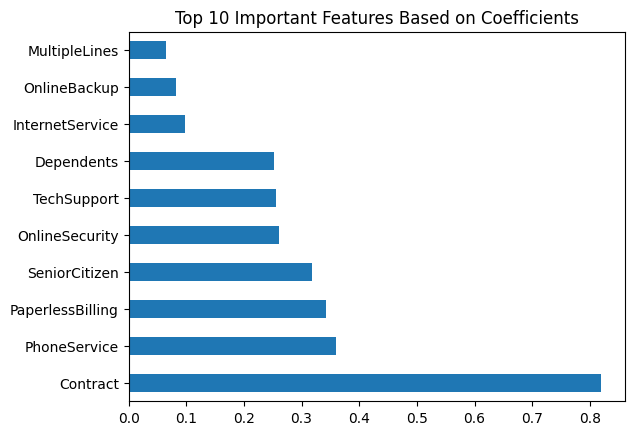

In [ ]:
# Get the coefficients from the logistic regression model
coefficients = pd.Series(clf.coef_[0], index=X.columns)

# Sort the coefficients by absolute value
coefficients = coefficients.abs().sort_values(ascending=False)

# Plot the top 10 features
coefficients.head(10).plot(kind='barh')
plt.title("Top 10 Important Features Based on Coefficients")
plt.show()

It provides insights into the most influential features of the model based on their absolute coefficient values. "Contract" is the most significant predictor indicating that the type of contract a customer has plays the major role in determining the outcome.Other important features include "PhoneService", "PaperlessBilling" and "SeniorCitizen". This suggests that customer retention and behavior could be strongly influenced by service type and also the billing methods. Understanding these feature impacts can help businesses make the data driven decisions to improve their models and customer strategies.

##Final Discussion on Prediction Model for the Customer Churn

The model to predict the customer churn developed using logistic regression provides valuable insights into identifying at risk customers by allowing the telecommunications company to take proactive measures for the retention. Strengths of the solution include its interpretability, computational efficiency and the ability to highlight key factors driving churn such as contract type, billing method and  the service usage. The model effectively improves recall **(0.79)** ensuring that more churners are identified though at the cost of lower precision **(0.50)** leading to a few false positives. A limitation is its struggle with class imbalance even after applying Synthetic Minority Oversampling resulting in misclassified non churners as churners which may lead to inefficient retention efforts. Business implications suggest prioritizing customers with a short term contracts, offering tailored retention strategies and improving service offerings based on churn drivers. Key informative features such as contract type, tenure and monthly charges provide actionable insights. The model remains explainable through feature importance analysis, allowing stakeholders to trust and leverage predictions for strategic customer engagement and  also retention planning. Further improvements could involve ensemble methods or cost sensitive learning to  the refine precision while maintaining high recall.